In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft, fftfreq


In [2]:
N = 8
y = np.array([ 1, 1, 1, 1, -1, -1, -1, -1])

n = np.arange(N)
k = n.reshape((N, 1))

M = np.exp(-2j * np.pi * k * n / N)
Y = np.dot(M, y) # Y = fft(y)
f = fftfreq(N)

IM = (1./N)*np.exp(2j * np.pi * k * n / N)
yp = np.dot(IM, Y) #yp = ifft(Y)


/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


Text(0, 0.5, 'Y(f)')

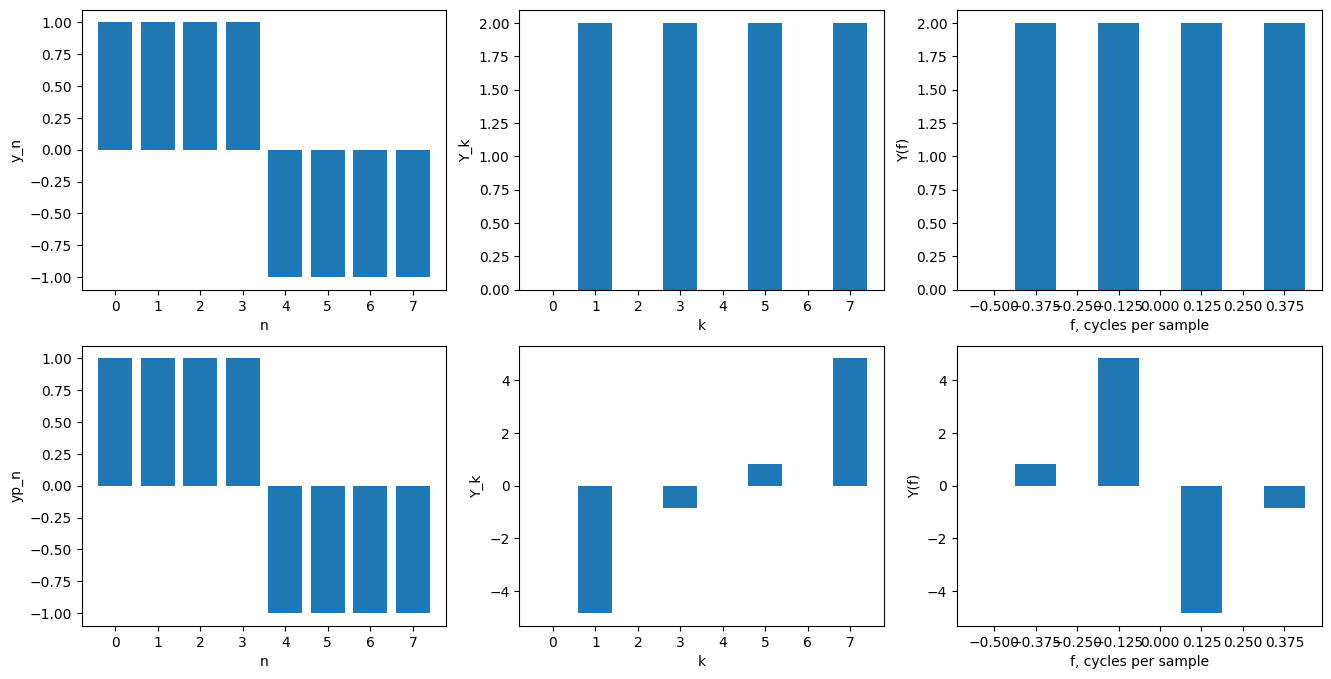

In [3]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
#phase = np.arctan(np.imag(Y)/np.real(Y))

axes[0][0].bar(n,y)
axes[1][0].bar(n,yp)
axes[0][1].bar(n,np.real(Y))
axes[1][1].bar(n,np.imag(Y))
axes[0][2].bar(f,np.real(Y),width=0.125)
axes[1][2].bar(f,np.imag(Y),width=0.125)

axes[0][0].set_xticks(list(n))
axes[1][0].set_xticks(list(n))
axes[0][1].set_xticks(list(n))
axes[1][1].set_xticks(list(n))
axes[0][2].set_xticks(list(f))
axes[1][2].set_xticks(list(f))

axes[0][0].set_xlabel('n')
axes[1][0].set_xlabel('n')
axes[0][1].set_xlabel('k')
axes[1][1].set_xlabel('k')
axes[0][2].set_xlabel('f, cycles per sample')
axes[1][2].set_xlabel('f, cycles per sample')

axes[0][0].set_ylabel('y_n')
axes[1][0].set_ylabel('yp_n')
axes[0][1].set_ylabel('Y_k')
axes[1][1].set_ylabel('Y_k')
axes[0][2].set_ylabel('Y(f)')
axes[1][2].set_ylabel('Y(f)')


Text(0.5, 1.0, 'phase of M_kn')

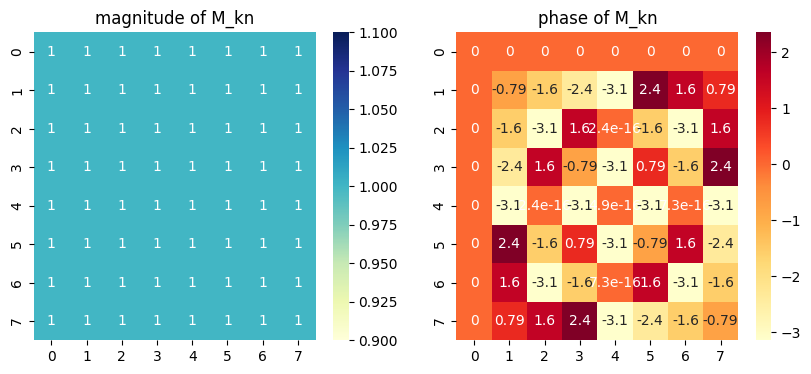

In [4]:
#sns.heatmap(np.real(M),annot=True)
#sns.heatmap(np.imag(M),annot=True)
#sns.heatmap(np.real(IM),annot=True)
#sns.heatmap(np.imag(IM),annot=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
sns.heatmap(np.abs(M), ax=axes[0], cmap="YlGnBu", annot=True)
axes[0].set_title('magnitude of M_kn')
sns.heatmap(np.angle(M), ax=axes[1], cmap="YlOrRd", annot=True)
axes[1].set_title('phase of M_kn')

if y(t) is real the fft has conjugate symmetry

The frequency term f=k/n is found at y[k]. At y[n/2] we reach the Nyquist frequency and wrap around to the negative-frequency terms. So, for an 8-point transform, the frequencies of the result are [0, 1, 2, 3, -4, -3, -2, -1]. To rearrange the fft output so that the zero-frequency component is centered, like [-4, -3, -2, -1, 0, 1, 2, 3], use fftshift.

The input should be ordered in the same way as is returned by fft, i.e.,

x[0] should contain the zero frequency term,

x[1:n//2] should contain the positive-frequency terms,

x[n//2 + 1:] should contain the negative-frequency terms, in increasing order starting from the most negative frequency.

For an even number of input points, x[n//2] represents the sum of the values at the positive and negative Nyquist frequencies, as the two are aliased together.

<ipython-input-5-5ad8de4916c2>:12: RuntimeWarning: invalid value encountered in divide
  axes[2].plot(f, np.arctan( np.imag(Y)/np.real(Y) ), "r")


Text(0, 0.5, 'imag(Y_k)')

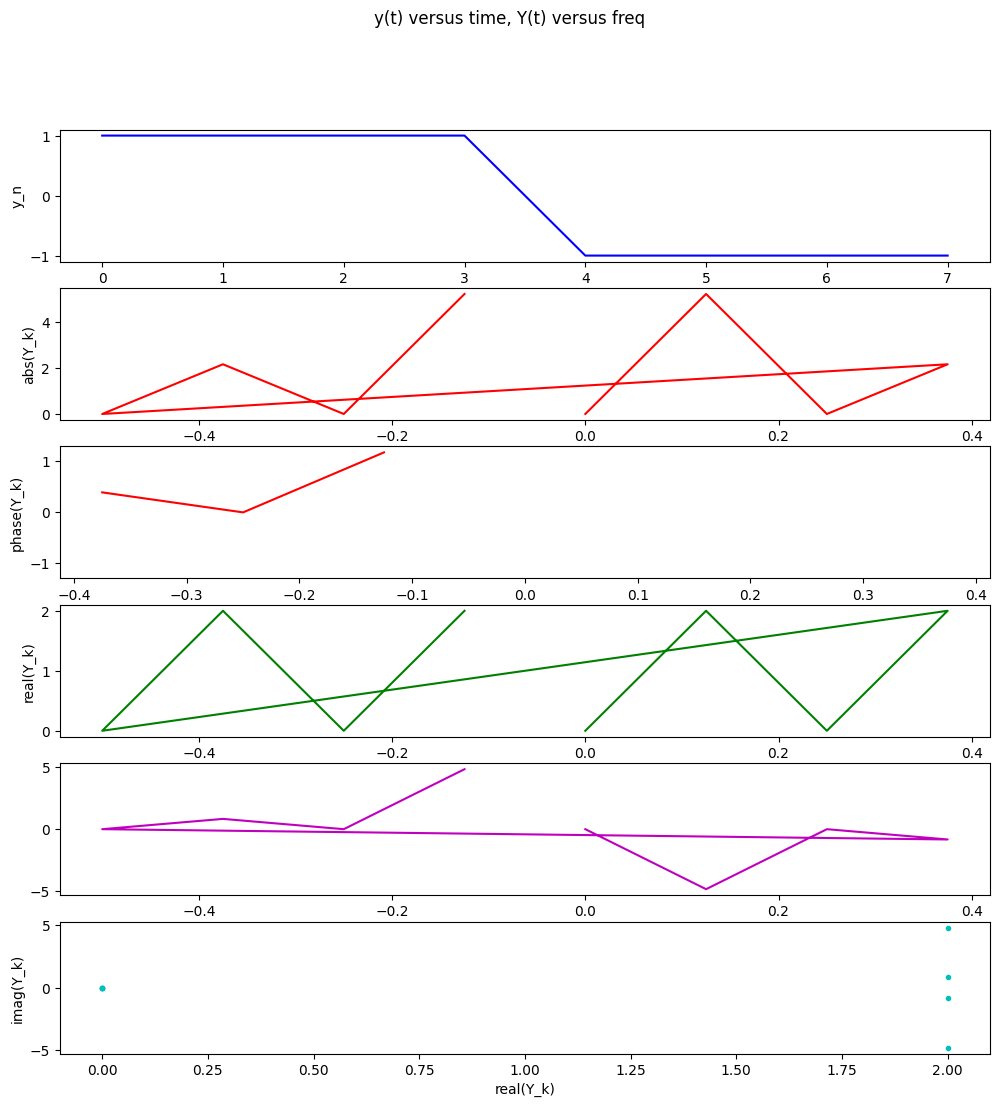

In [5]:
fig, axes = plt.subplots(6,figsize=(12, 12))
fig.suptitle('y(t) versus time, Y(t) versus freq')

axes[0].plot(n, y, "b")
axes[0].set_xlabel ('time, n ')
axes[0].set_ylabel ('y_n')

axes[1].plot(f, np.abs(Y), "r")
axes[1].set_xlabel ('freq, k')
axes[1].set_ylabel ('abs(Y_k)')

axes[2].plot(f, np.arctan( np.imag(Y)/np.real(Y) ), "r")
axes[2].set_xlabel ('freq, k')
axes[2].set_ylabel ('phase(Y_k)')

axes[3].plot(f, np.real(Y), "g")
axes[3].set_xlabel ('freq, k')
axes[3].set_ylabel ('real(Y_k)')

axes[4].plot(f, np.imag(Y), "m")
axes[4].set_xlabel ('freq, k')
axes[5].set_ylabel ('imag(Y_k)')

axes[5].plot(np.real(Y), np.imag(Y), "c.")
axes[5].set_xlabel ('real(Y_k)')
axes[5].set_ylabel ('imag(Y_k)')

In [6]:
dfty = dft(y)[0:Np//2]
plt.plot(xf,abs(dfty),"g")

NameError: ignored

In [ ]:
%timeit fft(y)

In [ ]:
%timeit dft(y)

In [ ]:
y = misc.electrocardiogram()
plt.plot(y)
Np = len(y)

f = fft(y)[0:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
yf = fftfreq(Np,1)[:Np//2] # arguments are sample number, sample dt, &  remove mirror%
plt.plot(yf,abs(f))
plt.ylim(0,1)